# Name: Parth Kothari
# Course: MSc
# Roll number: 2303121012

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

In [23]:
def plotter_map(filepath,name):
    f = open(filepath) #path to map
    N  = np.fromfile(f, count=3, dtype='uint64')
    N1,N2,N3 = N
    print(N1,N2,N3)
    l = np.fromfile(f, count=1, dtype='float32')
    print(l)
    data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
    f.close()
    data = np.reshape(data, (N1,N2,N3), order='C')
    index = 15 #x-y slice
    image = np.log10(data[0:128,0:128,index])
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title(f'{name} at redshift {filepath[-5]}')
    im = ax.imshow(image, interpolation='none', origin='lower', cmap='magma')
    fig.colorbar(im, ax=ax, label='$log(1+\delta)$')
    plt.show()


128 128 128
[0.28]


<ipython-input-23-f2d975e9f591>:12: RuntimeWarning: divide by zero encountered in log10
  image = np.log10(data[0:128,0:128,index])


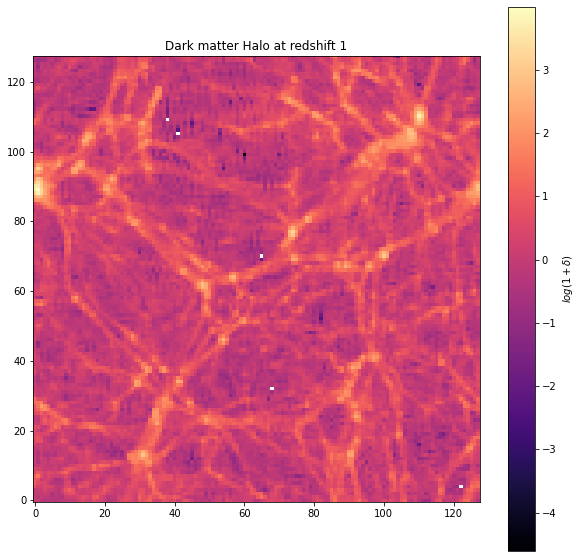

128 128 128
[0.28]


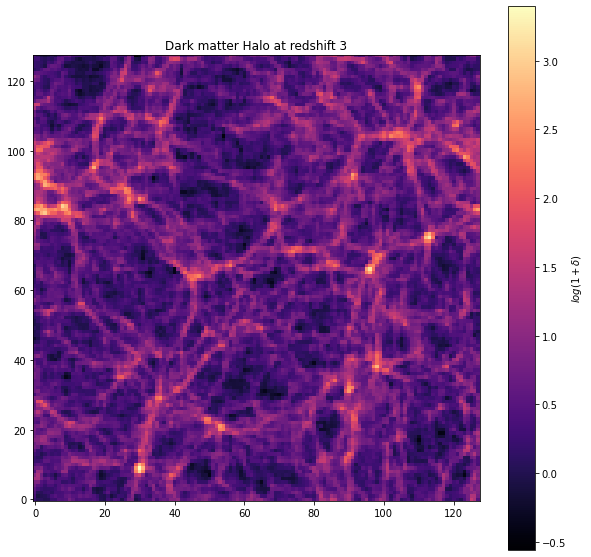

128 128 128
[0.28]


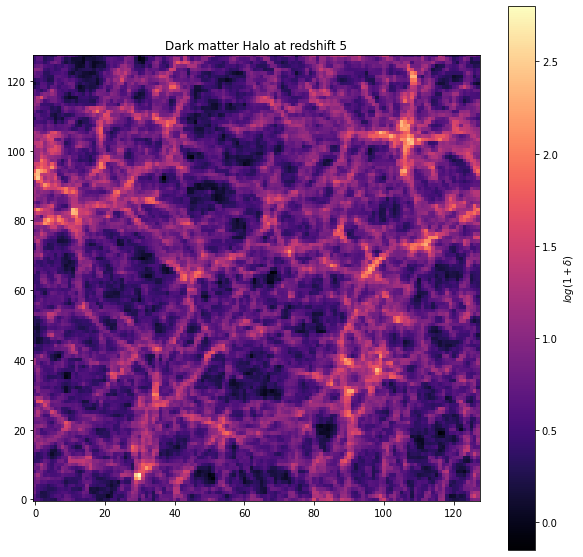

128 128 128
[0.28]


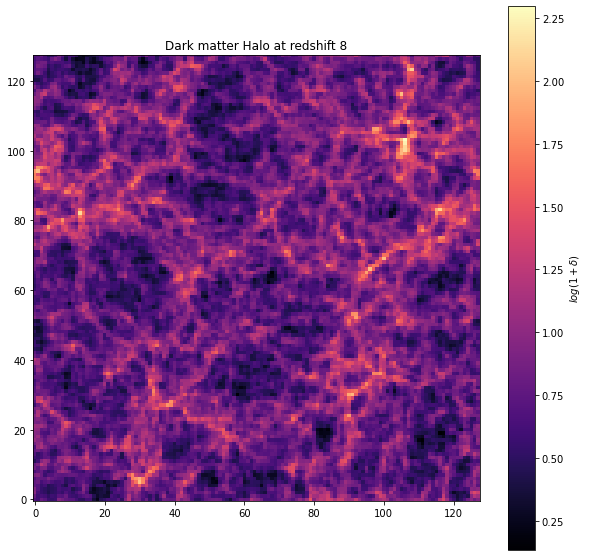

128 128 128
[0.28]


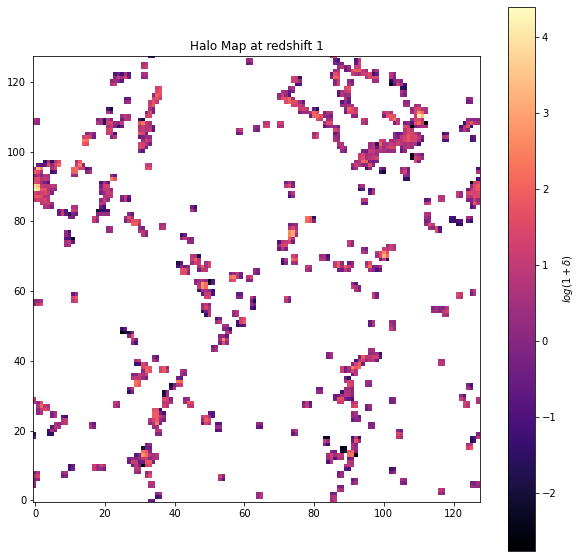

128 128 128
[0.28]


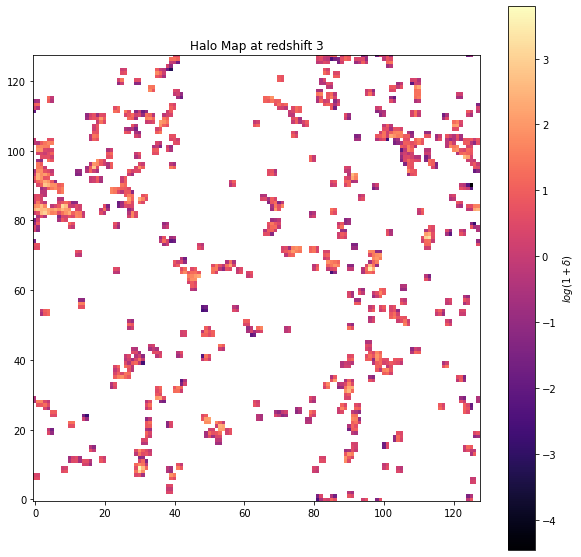

128 128 128
[0.28]


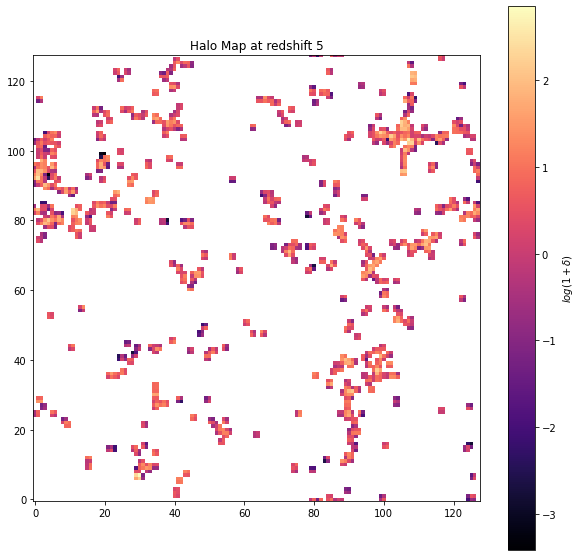

128 128 128
[0.28]


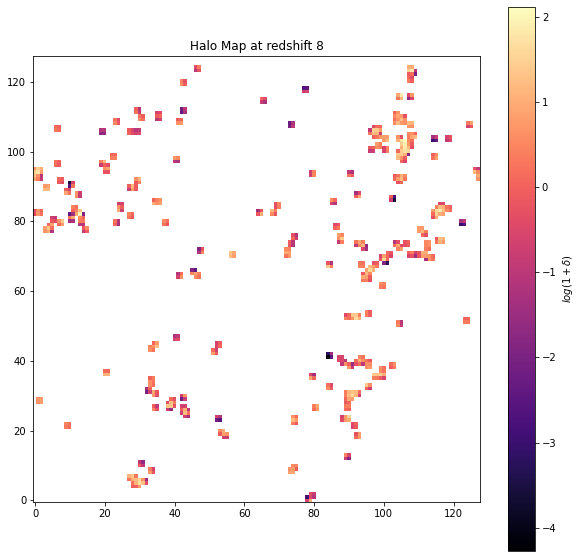

In [24]:
Dark_matter_512_standard= ['/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_1.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_3.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_5.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_8.000']
Halo_map_512_standard = ['/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_1.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_3.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_5.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_8.000']
for i in Dark_matter_512_standard:
    plotter_map(i,'Dark matter Halo')
for j in Halo_map_512_standard:
    plotter_map(j,'Halo Map')

## Convolution for DM and halo maps

In [2]:
# Number of gridpoints
N = 128

# Generated grid
x = np.linspace(-10, 10, N, endpoint=True)
y = np.linspace(-10, 10, N, endpoint=True)
z = np.linspace(-10, 10, N, endpoint=True)
X, Y, Z = np.meshgrid(x, y, z)

def Three_d_plotter(grid,name):
  # Creating  a 3D plot
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  # Flatten the grid coordinates and grid values for scatter plot
  x_flatten = X.flatten()
  y_flatten = Y.flatten()
  z_flatten = Z.flatten()
  grid_flatten = grid.flatten()

  # Plot the 3D scatter plot
  scatter = ax.scatter(x_flatten, y_flatten, z_flatten, c=grid_flatten, cmap='Spectral')

  # Create a ScalarMappable for colormap
  sm = ScalarMappable(cmap='Spectral')
  sm.set_array(grid_flatten)
  fig.colorbar(sm, ax=ax, label='Grid Value')

  # Set labels and title
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title(f'{name}')

  plt.show()

def sphere_3D(Number_of_points,radius,normalization):
  
  origin_of_sphere = (Number_of_points//2)  -1   #This solves the problem for odd number of points
  x = np.linspace(-origin_of_sphere, Number_of_points - origin_of_sphere, Number_of_points) 
  y = np.linspace(-origin_of_sphere, Number_of_points-  origin_of_sphere, Number_of_points)
  z = np.linspace(-origin_of_sphere, Number_of_points - origin_of_sphere, Number_of_points)
  X, Y, Z = np.meshgrid(x, y, z)
    # Initialize grid with zeros
  grid_new = np.zeros((Number_of_points, Number_of_points, Number_of_points))


  # Calculate distances from the center
  distances = np.sqrt(X**2 + Y**2 + Z**2)



  # Set values inside the sphere to 1
  grid_new[distances <= radius] = 1

  if normalization == 'Yes':
    c =  grid_new / np.sum(grid_new)
    return c
  elif normalization == 'No':
    c = grid_new
    return c
  else:
    raise ValueError('Pls provide Yes or No as parameter')

def FFT_to_invt(data,rad,normalization):
    sphere = sphere_3D(128,rad,normalization)                      
    sphere_filter_fft = np.fft.fftn(sphere)             #Taking FFT of the filter
    sphere_shift = np.fft.fftshift(sphere_filter_fft)   #Shifting the origin

    fft_grid = np.fft.fftn(data)                     #Same for the grid
    fft_shift_grid = np.fft.fftshift(fft_grid)

    FFT_of_both = fft_shift_grid * sphere_shift
    inverse_fft = np.fft.ifftn(FFT_of_both)
    return np.abs(inverse_fft)


## Dark matter map convolution 

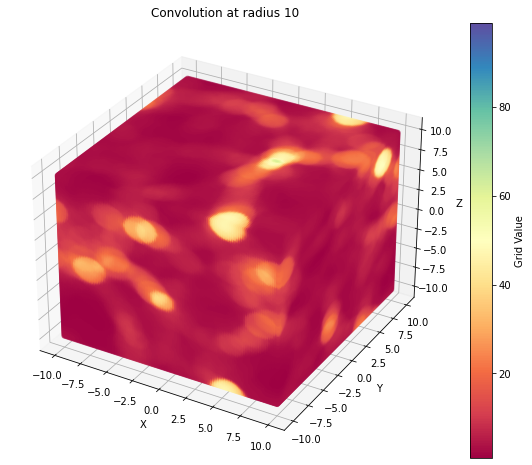

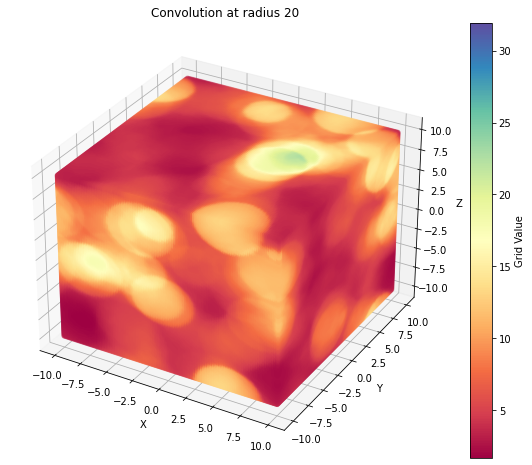

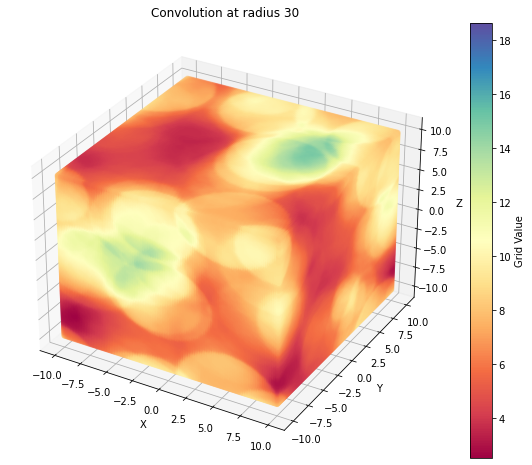

In [4]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/DM_map_1.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
DM_map_1 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]

for i in radius:
    array_made = FFT_to_invt(DM_map_1,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

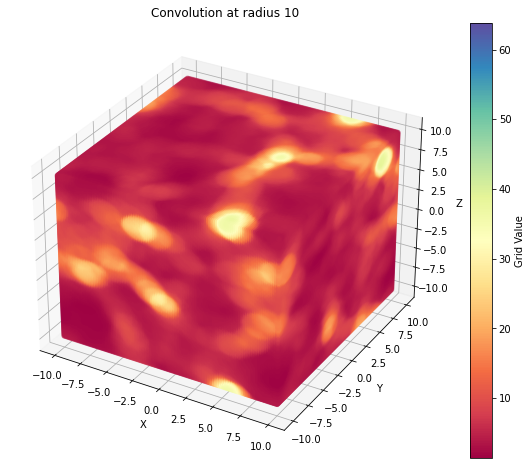

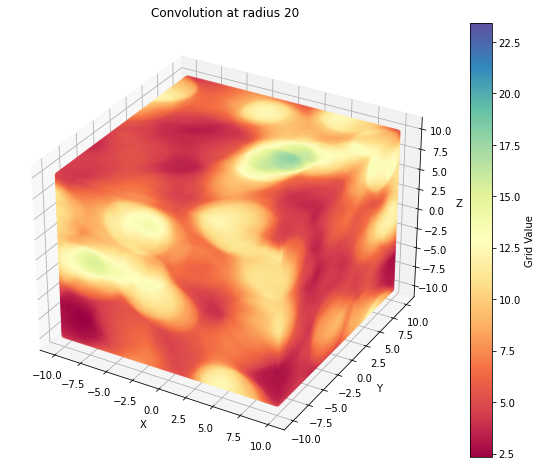

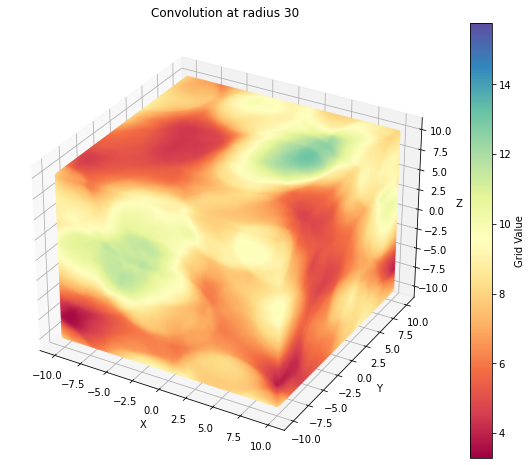

In [5]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/DM_map_3.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
DM_map_3 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(DM_map_3,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

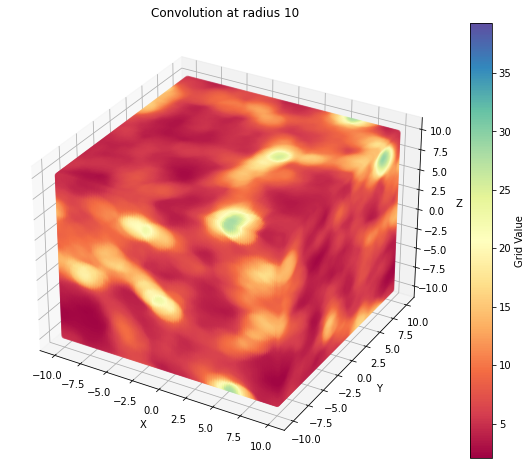

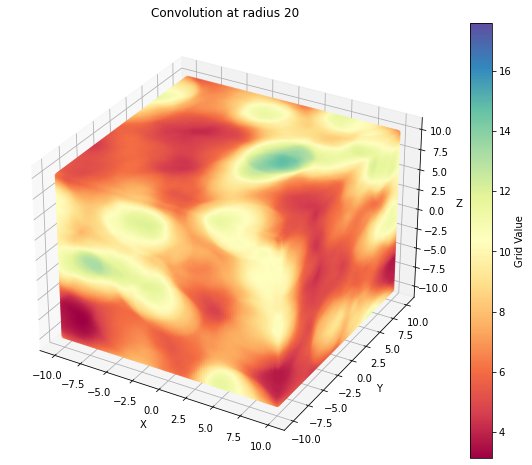

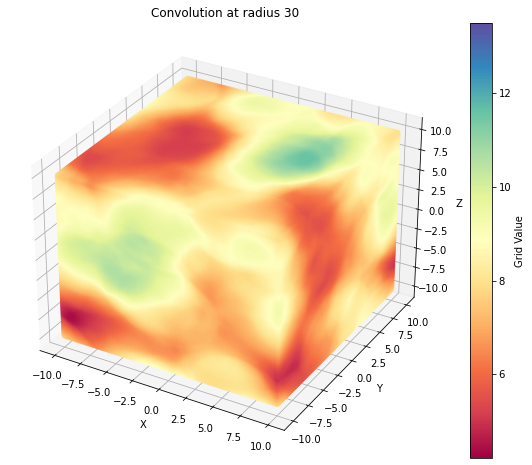

In [6]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/DM_map_5.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
DM_map_5 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(DM_map_5,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

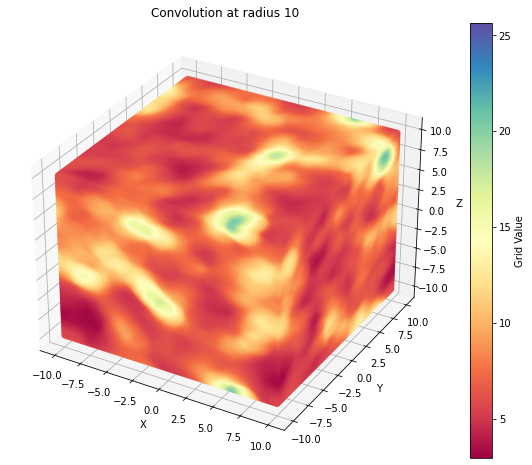

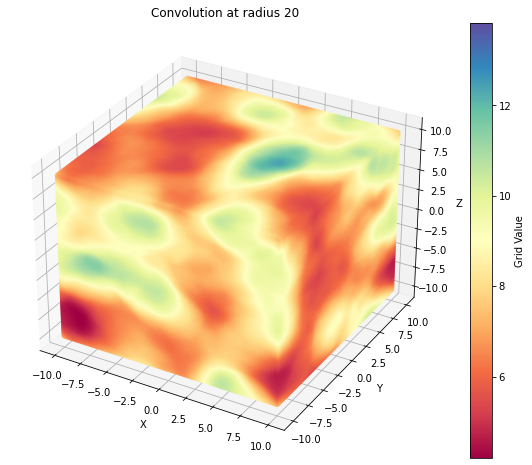

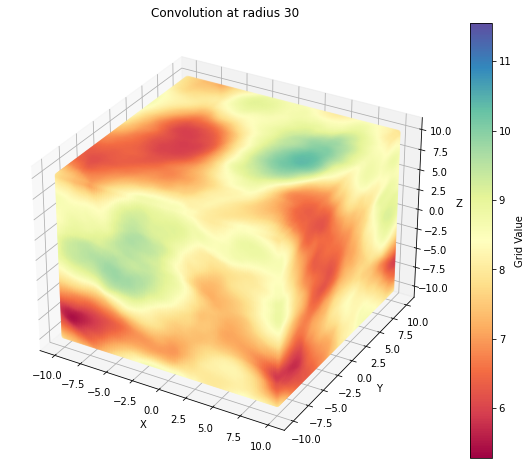

In [7]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/DM_map_8.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
DM_map_8 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(DM_map_8,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

## Halo map convolution


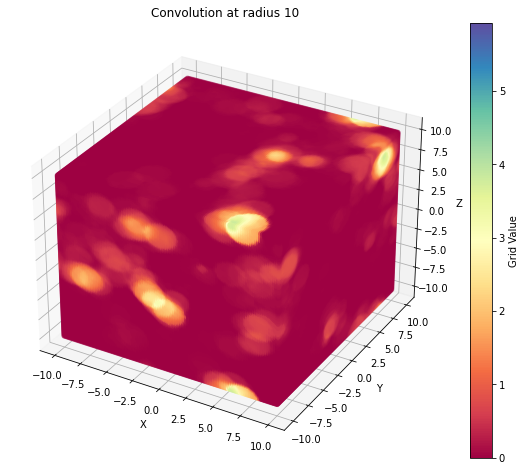

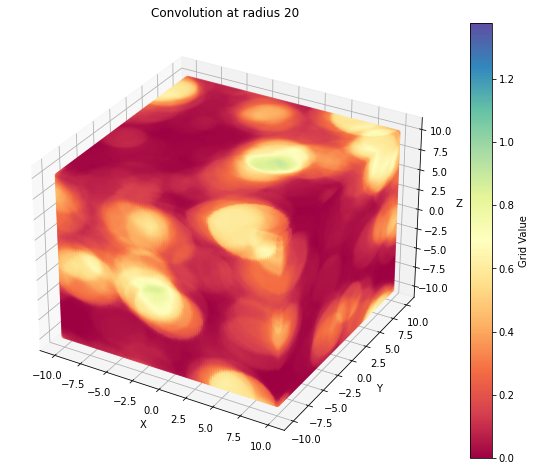

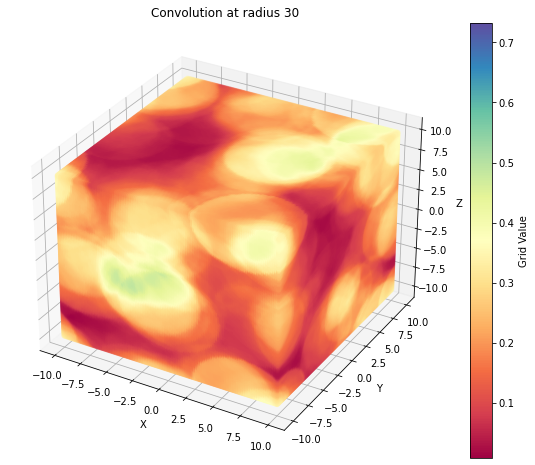

In [8]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/Halo_map_8.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
Halo_map_8 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(Halo_map_8,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

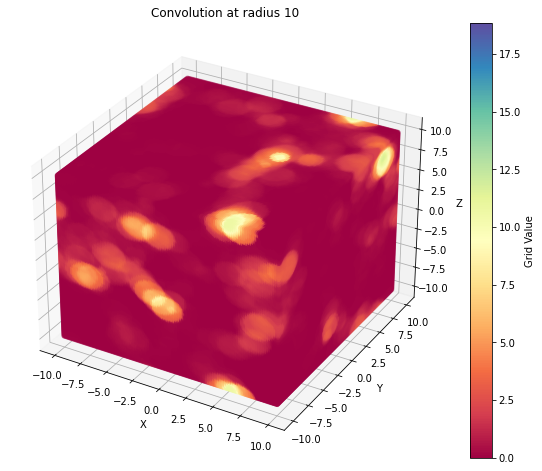

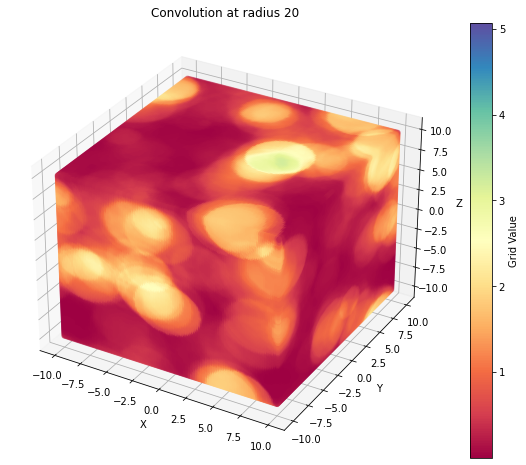

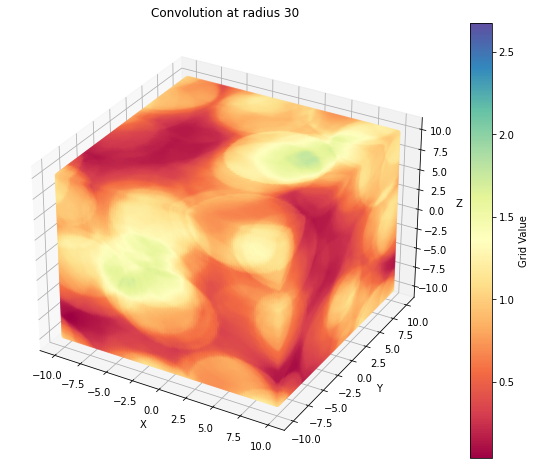

In [9]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/Halo_map_5.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
Halo_map_5 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(Halo_map_5,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

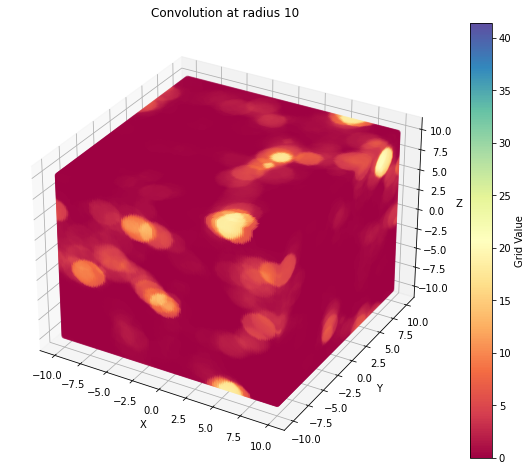

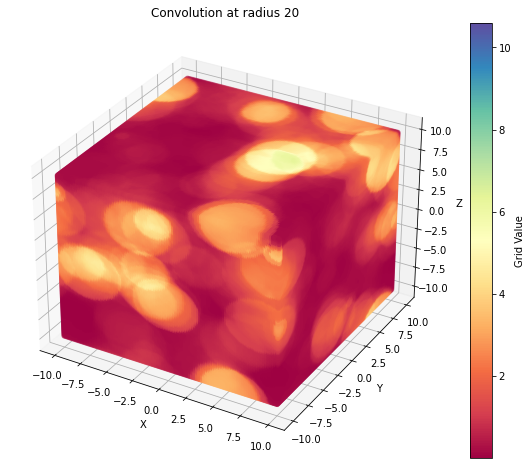

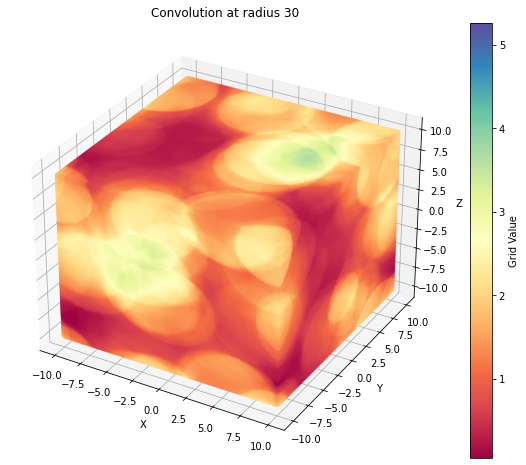

In [10]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/Halo_map_3.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
Halo_map_3 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(Halo_map_3,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

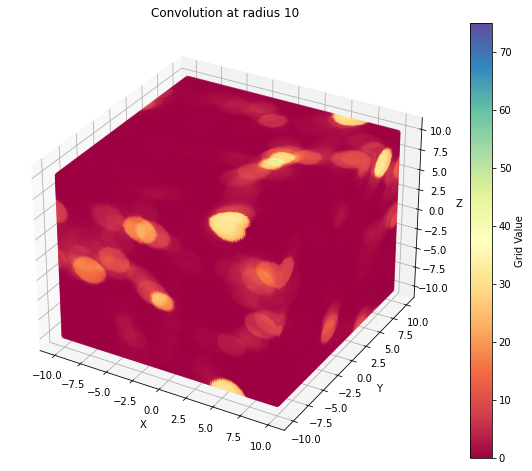

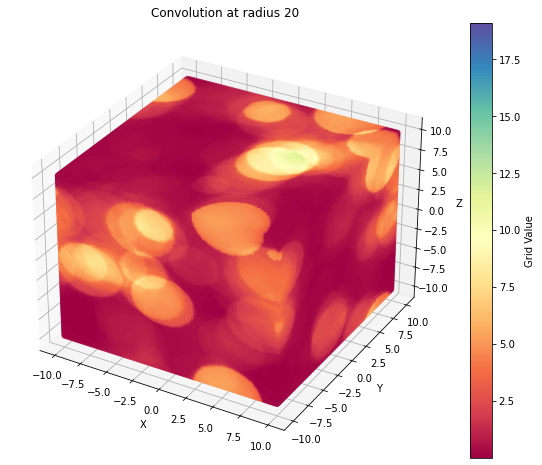

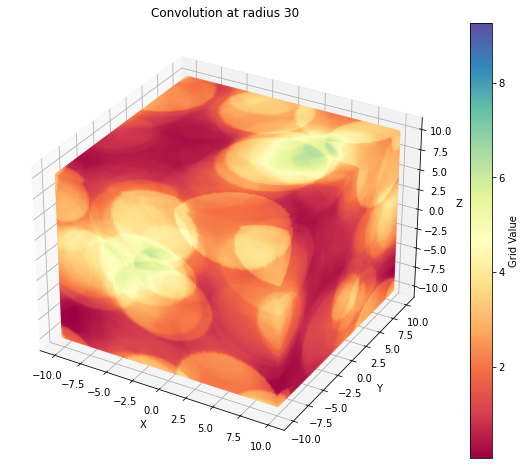

In [11]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/Halo_map_1.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
Halo_map_1 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(Halo_map_1,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

In [20]:
def Power_spectrum(path_D,path_H):

    # For density
    data_D = np.genfromtxt(path_D).transpose()
    k_mode_D = data_D[0]
    Power_D = data_D[1]
    Bins_D = data_D[4]

    # For halo
    data_H = np.genfromtxt(path_H).transpose()
    k_mode_H = data_H[0]
    Power_H = data_H[1]
    Bins_H = data_H[4]

    # For Bias
    p = Power_H / Power_D

    # Plotting
    plt.figure(figsize=(21, 6)) 

    plt.subplot(1, 3, 1)
    plt.plot(k_mode_D, Power_D)
    plt.errorbar(k_mode_D,Power_D,Power_D/np.sqrt(Bins_D))
    plt.xlabel("k mode")
    plt.ylabel("Power")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(fr"Power spectrum at $z = ${path_D[-1]} for Density of dark matter")
    
    plt.subplot(1, 3, 2)
    plt.plot(k_mode_H, Power_H)
    plt.errorbar(k_mode_H,Power_H,Power_H/np.sqrt(Bins_H))
    plt.xlabel("k mode")
    plt.ylabel("Power")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(fr"Power spectrum at $z = ${path_H[-1]} for Dark matter Halo")

    plt.subplot(1, 3, 3)
    plt.plot(k_mode_D, p)
    plt.xlabel("k mode")
    plt.ylabel("Power bias")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(fr"Power spectrum bias at $z = ${path_D[-1]}")

    plt.tight_layout()  
    plt.show()

## Power spectrum for 5k bins

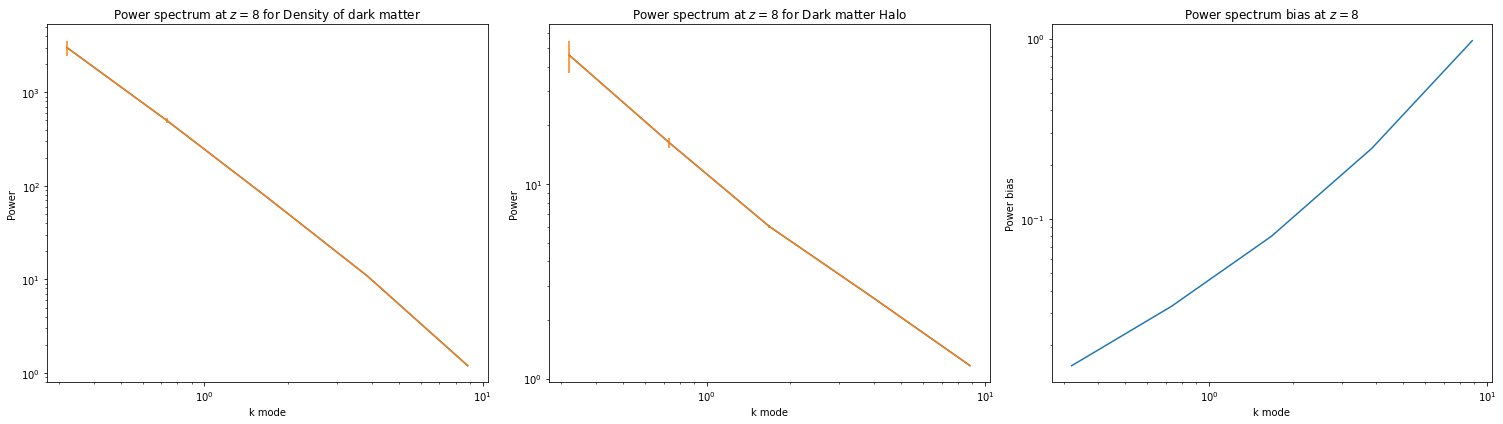

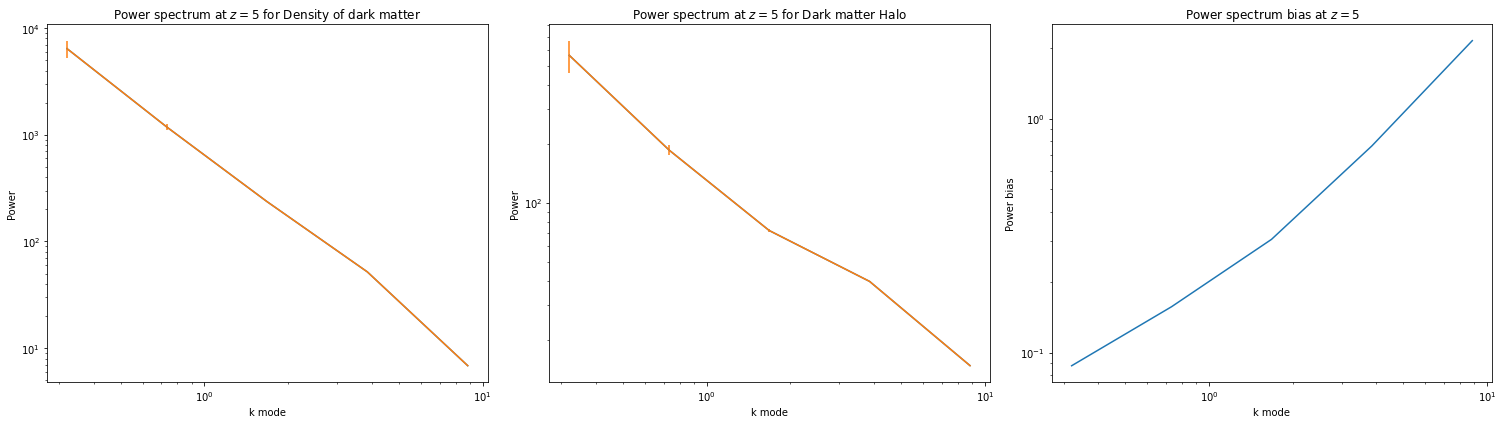

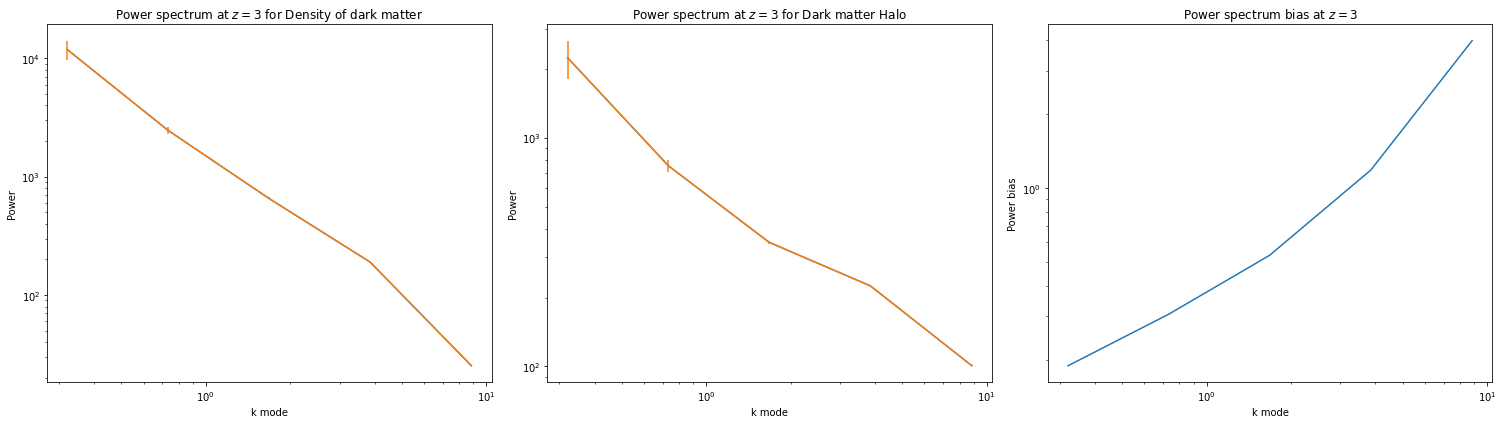

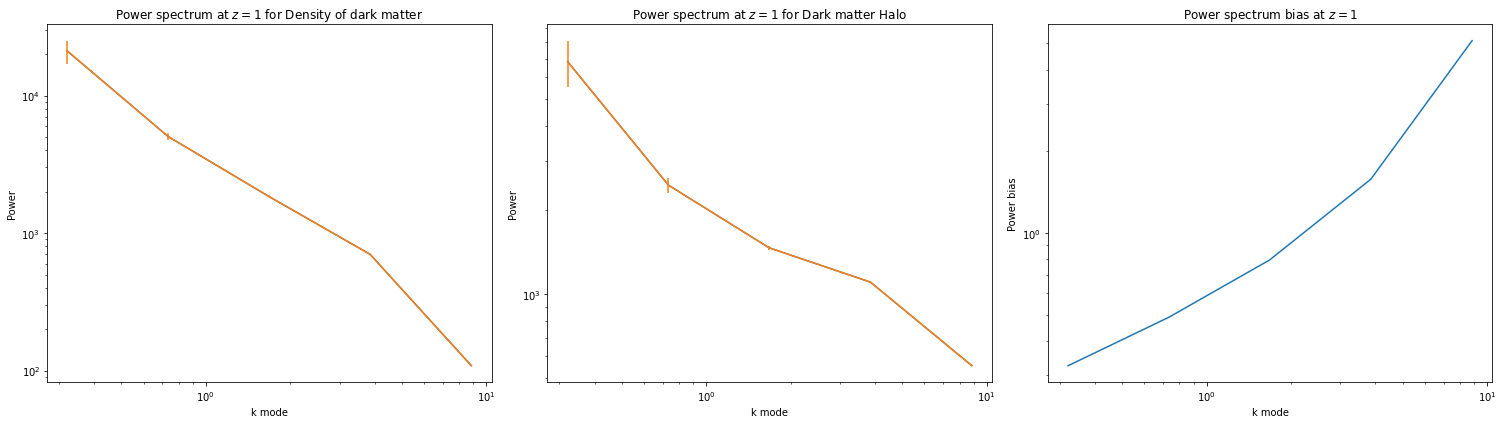

In [21]:
D11_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/5k_PK_DM_1"
H11_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/5k_PK_HM_1"
D33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/5k_PK_DM_3"
H33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/5k_PK_HM_3"
D55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/5k_PK_DM_5"
H55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/5k_PK_HM_5"
D88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/5k_PK_DM_8"
H88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/5k_PK_HM_8"

d1_512 = [D88_512,D55_512,D33_512,D11_512]
h1_512 = [H88_512,H55_512,H33_512,H11_512]

for i,j in zip(d1_512,h1_512):
    Power_spectrum(i,j)

# Power spectrum 10 k bin

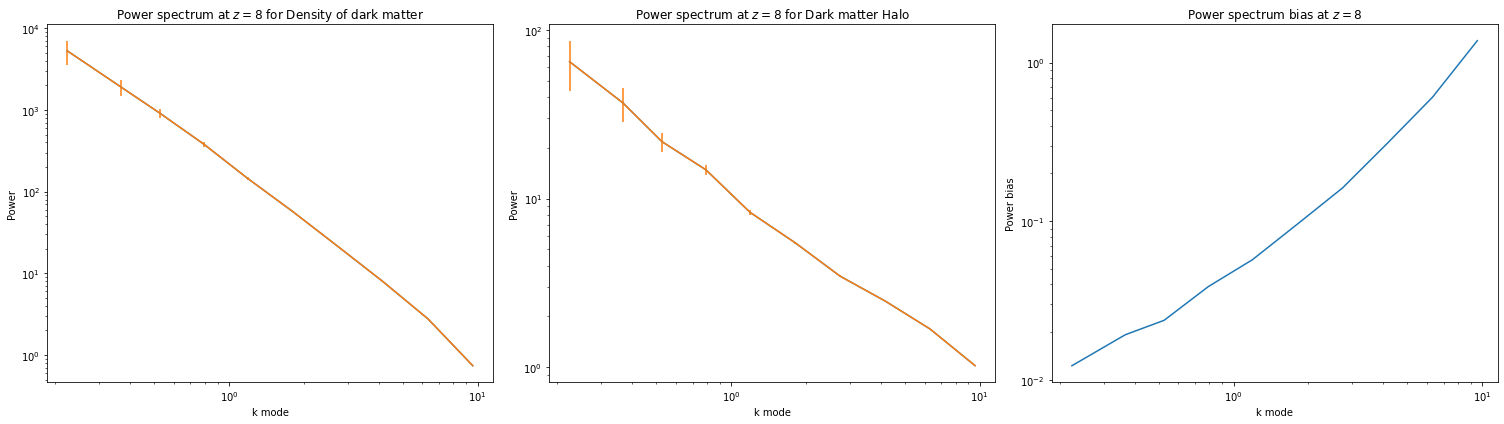

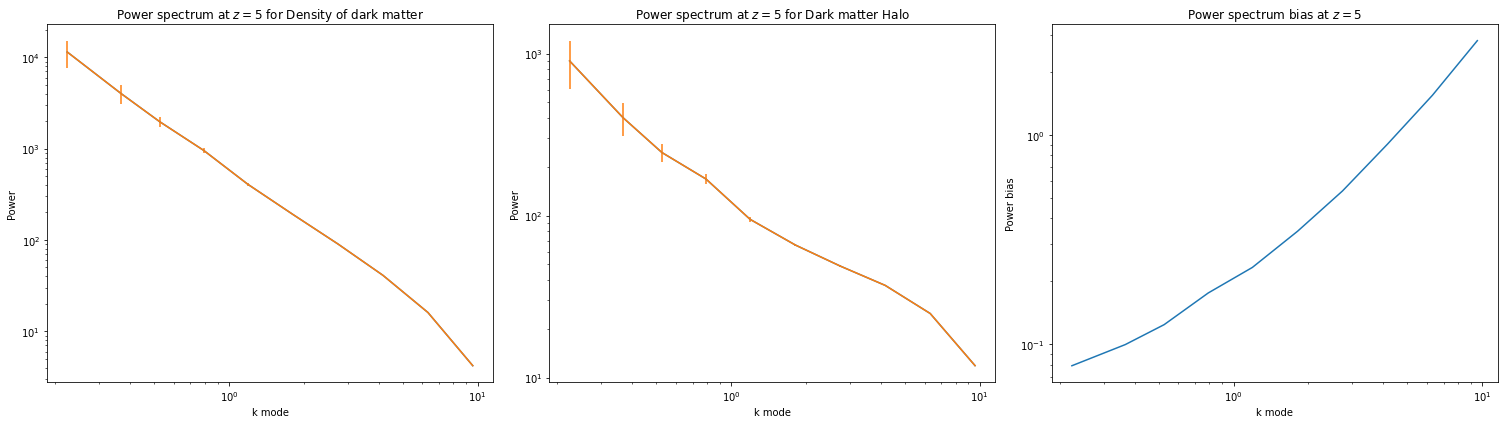

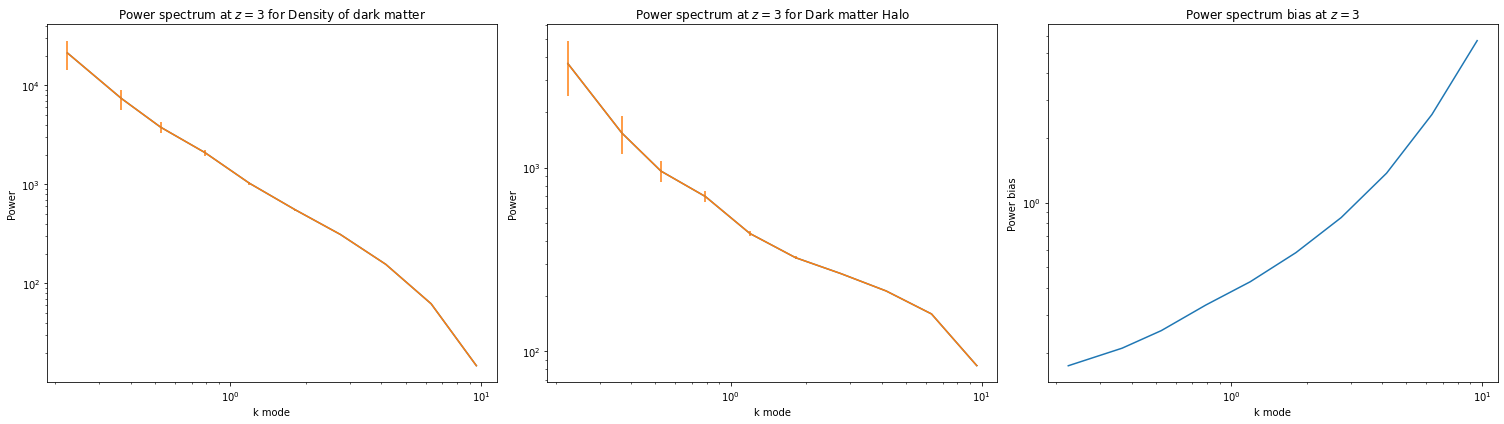

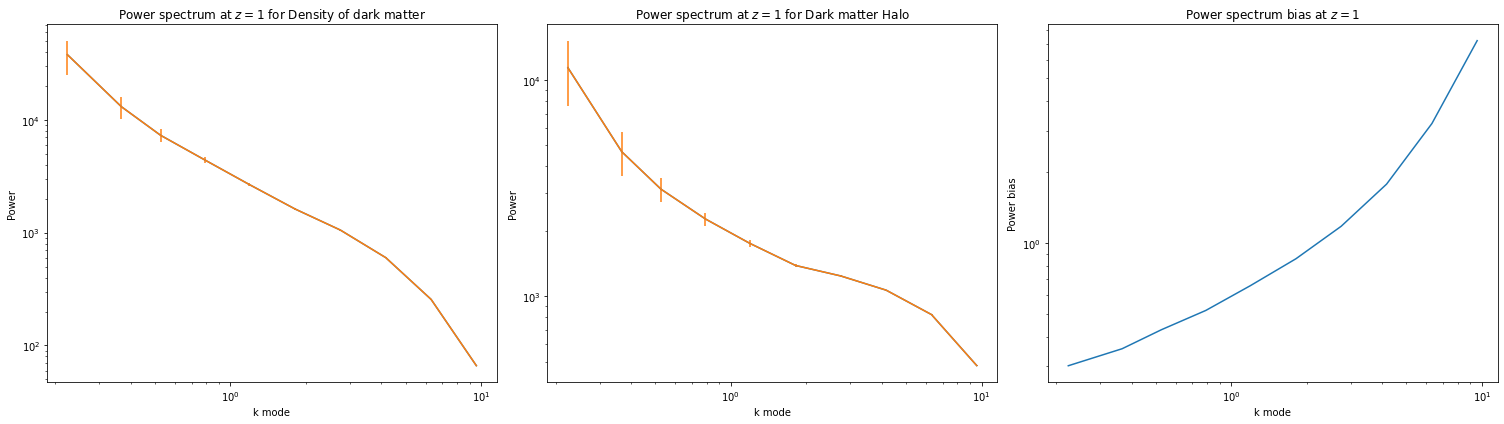

In [22]:
D11_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/10k_PK_DM_1"
H11_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/10k_PK_HM_1"
D33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/10k_PK_DM_3"
H33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/10k_PK_HM_3"
D55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/10k_PK_DM_5"
H55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/10k_PK_HM_5"
D88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/10k_PK_DM_8"
H88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Denisty_128_alteranate_model_512_grid/10k_PK_HM_8"

d1_512 = [D88_512,D55_512,D33_512,D11_512]
h1_512 = [H88_512,H55_512,H33_512,H11_512]

for i,j in zip(d1_512,h1_512):
    Power_spectrum(i,j)